In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Part 1: Data Preparation
def prepare_data(file_path):
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
    df.set_index('date', inplace=True)
    return df

In [3]:
# Load the dataset
data = prepare_data('exchange_rate.csv')

In [4]:
# EDA
data.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


In [5]:
data.tail()

,Ex_rate
date,
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197
2010-10-09,0.720825
2010-10-10,0.720825


In [6]:
data.isnull()

,Ex_rate
date,
1990-01-01,False
1990-01-02,False
1990-01-03,False
1990-01-04,False
1990-01-05,False
...,...
2010-10-06,False
2010-10-07,False
2010-10-08,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


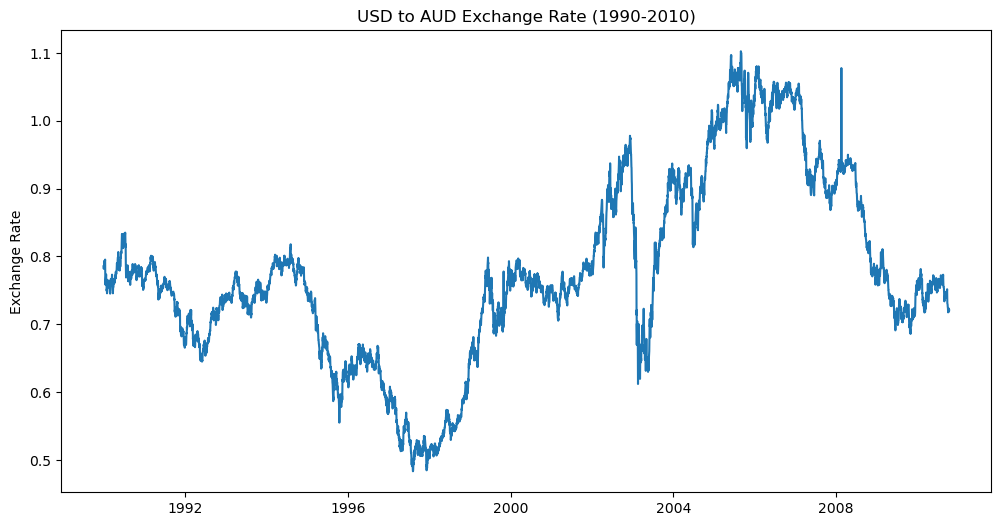

In [8]:
# Plot Initial Series
plt.figure(figsize=(12,6))
plt.plot(data['Ex_rate'])
plt.title('USD to AUD Exchange Rate (1990-2010)')
plt.ylabel('Exchange Rate')
plt.show()

In [9]:
# Split into training and testing (80/20)
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

In [10]:
# Part 2: Model Building - ARIMA
# Note: Initial parameters (1,1,1) based on standard currency behavior
arima_model = ARIMA(train['Ex_rate'], order=(1,1,1))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))

C:\Users\harsh\anaconda3\envs\data_analysis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\harsh\anaconda3\envs\data_analysis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\harsh\anaconda3\envs\data_analysis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [11]:
# Part 3: Model Building - Exponential Smoothing (Holt's Linear)
exp_model = ExponentialSmoothing(train['Ex_rate'], trend='add', seasonal=None)
exp_result = exp_model.fit()
exp_forecast = exp_result.forecast(len(test))

C:\Users\harsh\anaconda3\envs\data_analysis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [12]:
# Part 4: Evaluation Metrics
def compute_metrics(actual, forecast, model_name):
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    print(f"--- {model_name} Metrics ---")
    print(f"MAE: {mae:.5f}")
    print(f"RMSE: {rmse:.5f}")
    print(f"MAPE: {mape:.2f}% \n")

compute_metrics(test['Ex_rate'], arima_forecast, "ARIMA")
compute_metrics(test['Ex_rate'], exp_forecast, "Exponential Smoothing")

--- ARIMA Metrics ---
MAE: 0.17771
RMSE: 0.20544
MAPE: 22.80% 

--- Exponential Smoothing Metrics ---
MAE: 0.20660
RMSE: 0.23910
MAPE: 26.51% 



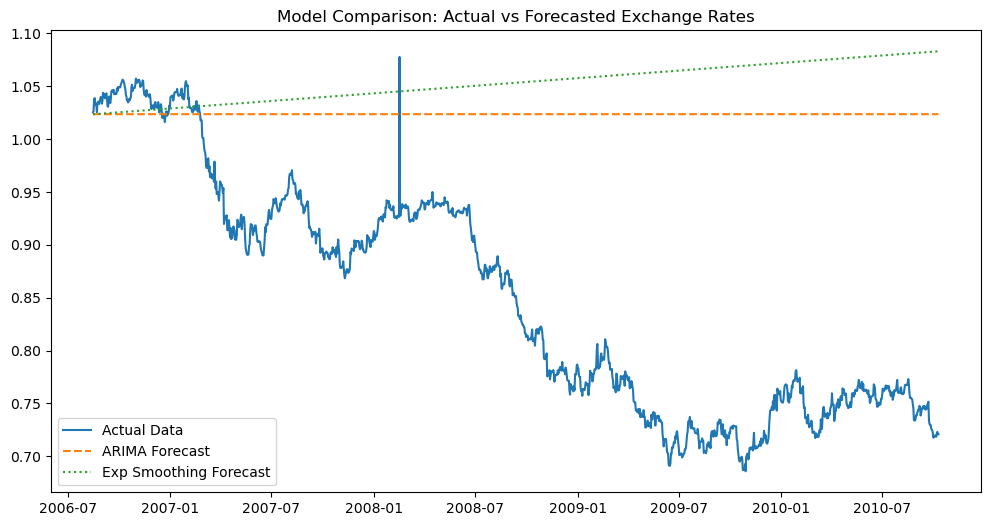

In [13]:
# Visualization of Forecasts
plt.figure(figsize=(12,6))
plt.plot(test.index, test['Ex_rate'], label='Actual Data')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(test.index, exp_forecast, label='Exp Smoothing Forecast', linestyle=':')
plt.legend()
plt.title('Model Comparison: Actual vs Forecasted Exchange Rates')
plt.show()